In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Audiobooks_data.csv',delimiter=',')
raw_data.head()

,00994,1620,1620.1,19.73,19.73.1,1,10.00,0.99,1603.80,5,92,0
0,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
1,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
3,3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0
4,3416,2160.0,2160,4.61,4.61,0,8.91,0.00,0.0,0,0,0


In [3]:
data = raw_data.rename(columns = {'00994': 'User ID', '1620': 'Overall_Book_Length','1620.1':'Avg_Book_Length','19.73':'Avg_Price','19.73.1':'del_Avg_price','1':'Review_given','10.00':'Review_rating','0.99':'Completion','1603.80':'Minutes_listened','5':'Support_requested','92':'Last_visited-Purchase_date','0':'Targets' }, inplace = False)
data.describe(include='all')

,User ID,Overall_Book_Length,Avg_Book_Length,Avg_Price,del_Avg_price,Review_given,Review_rating,Completion,Minutes_listened,Support_requested,Last_visited-Purchase_date,Targets
count,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000
mean,16773.611943,1591.279646,1678.612796,7.102894,7.542940,0.160690,8.909717,0.125598,189.788585,0.069871,61.932898,0.158844
std,9691.239210,504.358512,654.861664,4.930700,5.559378,0.367258,0.643363,0.241104,370.905846,0.470342,88.210402,0.365544
min,2.000000,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8371.500000,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16715.000000,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,25187.500000,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,33683.000000,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [4]:
data.isnull().sum()

User ID                       0
Overall_Book_Length           0
Avg_Book_Length               0
Avg_Price                     0
del_Avg_price                 0
Review_given                  0
Review_rating                 0
Completion                    0
Minutes_listened              0
Support_requested             0
Last_visited-Purchase_date    0
Targets                       0
dtype: int64

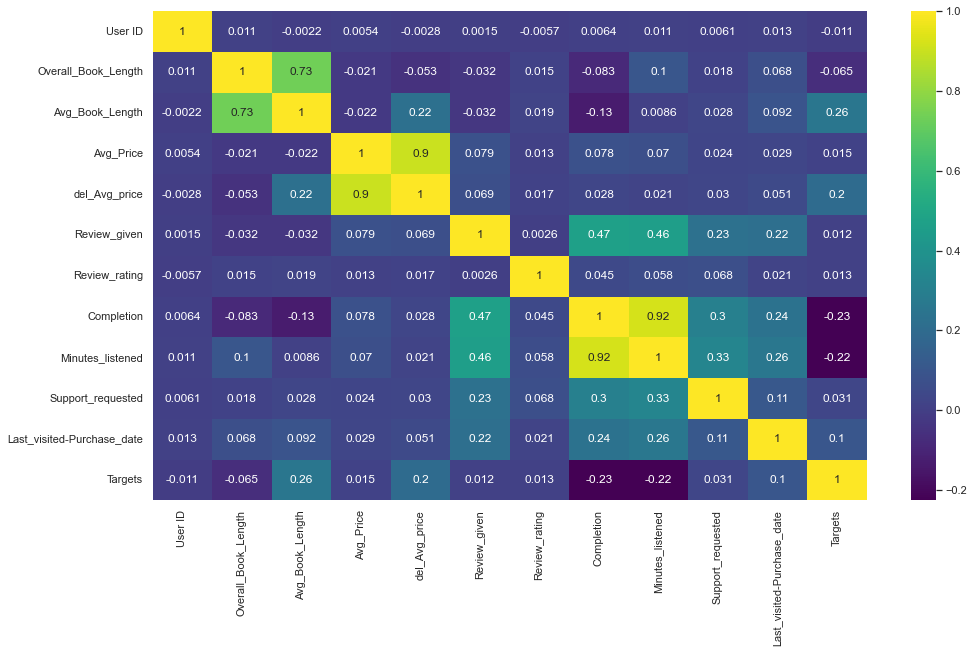

In [5]:
plt.figure(figsize=(16,9))
x = data
ax = sns.heatmap(x.corr(),annot = True,cmap = 'viridis')
plt.show()

In [6]:
data_1 = data.drop(['User ID','del_Avg_price','Review_given','Completion','Avg_Book_Length'],axis =1)
data_1.head()

,Overall_Book_Length,Avg_Price,Review_rating,Minutes_listened,Support_requested,Last_visited-Purchase_date,Targets
0,2160.0,5.33,8.91,0.0,0,0,0
1,2160.0,5.33,8.91,0.0,0,388,0
2,1620.0,5.96,8.91,680.4,1,129,0
3,2160.0,5.33,8.91,475.2,0,361,0
4,2160.0,4.61,8.91,0.0,0,0,0


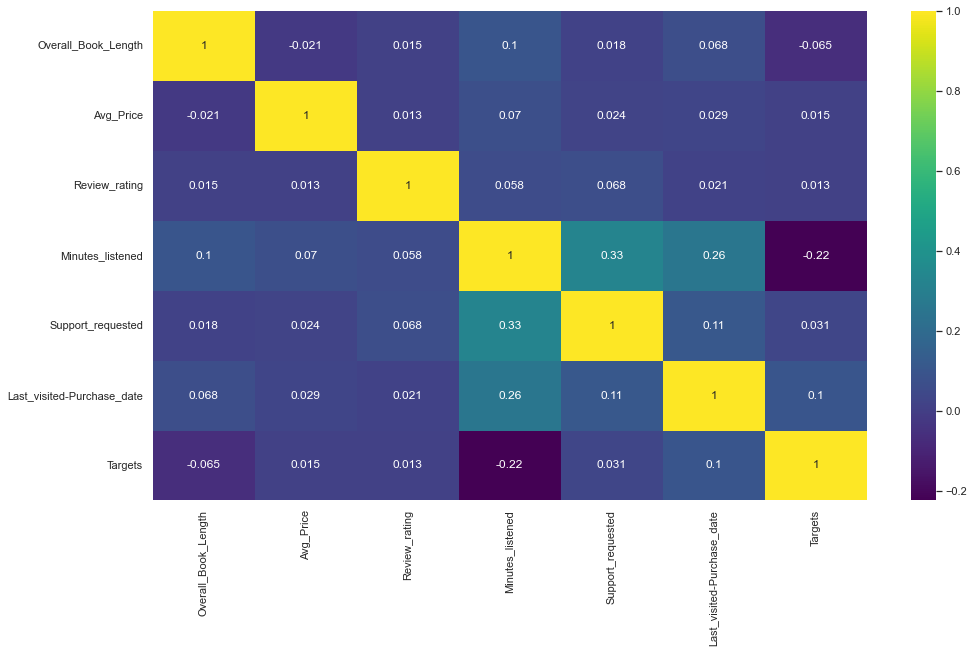

In [7]:
plt.figure(figsize=(16,9))
x = data_1
ax = sns.heatmap(x.corr(),annot = True,cmap = 'viridis')
plt.show()

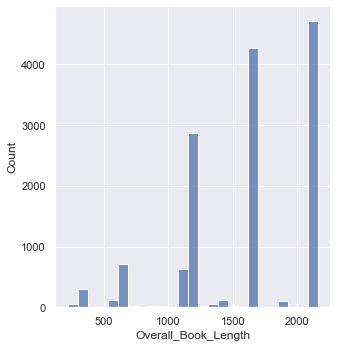

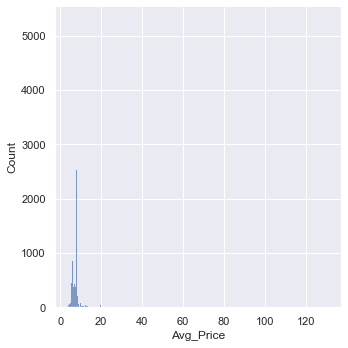

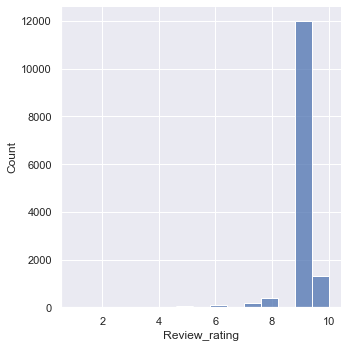

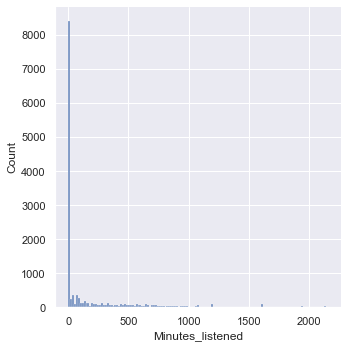

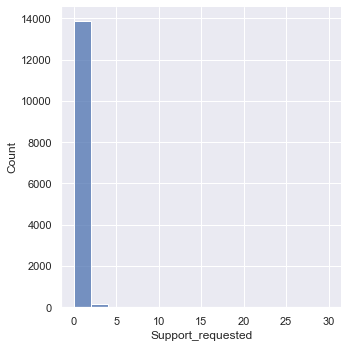

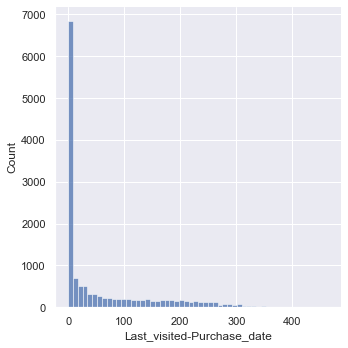

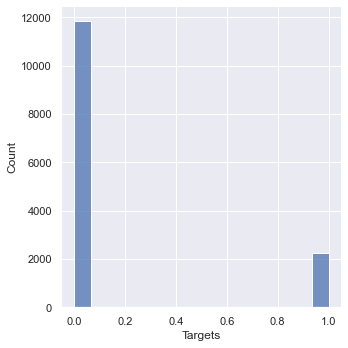

In [8]:
sns.displot(data_1['Overall_Book_Length'])
sns.displot(data_1['Avg_Price'])
sns.displot(data_1['Review_rating'])
sns.displot(data_1['Minutes_listened'])
sns.displot(data_1['Support_requested'])
sns.displot(data_1['Last_visited-Purchase_date'])
sns.displot(data_1['Targets'])

In [24]:
data_1 = data_1.reset_index(drop = True)
data_1.describe()

,Overall_Book_Length,Avg_Price,Review_rating,Minutes_listened,Support_requested,Last_visited-Purchase_date,Targets
count,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000,14083.000000
mean,1591.279646,7.102894,8.909717,189.788585,0.069871,61.932898,0.158844
std,504.358512,4.930700,0.643363,370.905846,0.470342,88.210402,0.365544
min,216.000000,3.860000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.000000,5.330000,8.910000,0.000000,0.000000,0.000000,0.000000
50%,1620.000000,5.950000,8.910000,0.000000,0.000000,11.000000,0.000000
75%,2160.000000,8.000000,8.910000,194.400000,0.000000,105.000000,0.000000
max,2160.000000,130.940000,10.000000,2160.000000,30.000000,464.000000,1.000000


In [10]:
targets_all = data_1['Targets']
inputs = data_1.drop(['Targets'],axis = 1)
inputs.head()

,Overall_Book_Length,Avg_Price,Review_rating,Minutes_listened,Support_requested,Last_visited-Purchase_date
0,2160.0,5.33,8.91,0.0,0,0
1,2160.0,5.33,8.91,0.0,0,388
2,1620.0,5.96,8.91,680.4,1,129
3,2160.0,5.33,8.91,475.2,0,361
4,2160.0,4.61,8.91,0.0,0,0


In [14]:
#standardize the data
from sklearn import preprocessing 
scaled_inputs = preprocessing.scale(inputs)
scaled_inputs

array([[ 1.12765133e+00, -3.59575129e-01,  4.39285820e-04,
        -5.11707554e-01, -1.48559799e-01, -7.02129178e-01],
       [ 1.12765133e+00, -3.59575129e-01,  4.39285820e-04,
        -5.11707554e-01, -1.48559799e-01,  3.69660123e+00],
       [ 5.69463445e-02, -2.31799697e-01,  4.39285820e-04,
         1.32278539e+00,  1.97762683e+00,  7.60335314e-01],
       ...,
       [ 1.12765133e+00, -1.95292431e-01,  4.39285820e-04,
        -5.11707554e-01, -1.48559799e-01, -7.02129178e-01],
       [ 5.69463445e-02, -3.59575129e-01, -1.41405333e+00,
         1.14807178e+00, -1.48559799e-01,  3.18194886e-01],
       [ 1.64016843e-01, -3.59575129e-01,  4.39285820e-04,
        -5.11707554e-01, -1.48559799e-01, -7.02129178e-01]])

In [16]:
#shuffle the data
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_all[shuffled_indices]

In [21]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(shuffled_inputs,shuffled_targets,test_size = 0.2,random_state = 42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
y_predictor = KNC.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predictor)

array([[2322,   46],
       [ 284,  165]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictor))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2368
           1       0.78      0.37      0.50       449

    accuracy                           0.88      2817
   macro avg       0.84      0.67      0.72      2817
weighted avg       0.87      0.88      0.86      2817

